In [14]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import wikifunctions as wf
from urllib.parse import urlparse

In [2]:
page1_title = 'Elon Musk'
page2_title = 'Tesla, Inc.'


enwiki_endpoint = 'en.wikipedia.org/w/api.php'

In [3]:
page1_rev_df = wf.get_all_page_revisions(page1_title,endpoint=enwiki_endpoint)
page2_rev_df = wf.get_all_page_revisions(page2_title,endpoint=enwiki_endpoint)

In [4]:
page1_user_count = len(page1_rev_df['user'].unique())
page2_user_count = len(page2_rev_df['user'].unique())
print("The '{0}' article has {1:,} unique editors.".format(page1_title,page1_user_count))
print("The '{0}' article has {1:,} unique editors.".format(page2_title,page2_user_count))

The 'Elon Musk' article has 3,480 unique editors.
The 'Tesla, Inc.' article has 3,198 unique editors.


In [5]:
page1_first_rev = min(page1_rev_df['date'])
print("The '{0}' article was first edited on {1:}.".format(page1_title,page1_first_rev))

The 'Elon Musk' article was first edited on 2004-08-18.


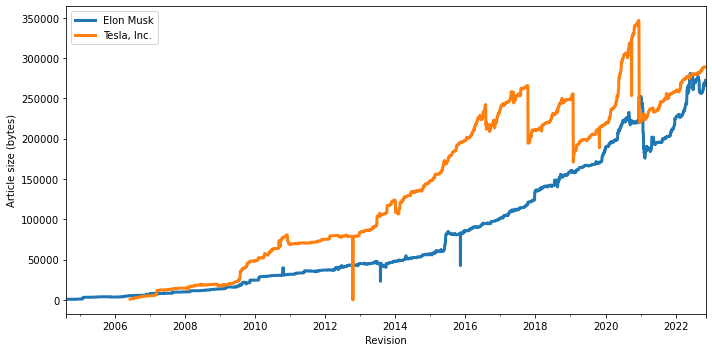

In [6]:
f,ax = plt.subplots(1,1,figsize=(10,5))

page1_size_agg = page1_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'size':'median'}).fillna(method='ffill')
page2_size_agg = page2_rev_df.groupby(pd.Grouper(key='timestamp',freq='1D')).agg({'size':'median'}).fillna(method='ffill')

page1_size_agg.columns = [page1_title]
page2_size_agg.columns = [page2_title]

page1_size_agg.plot(ax=ax,lw=3)
page2_size_agg.plot(ax=ax,lw=3)

ax.set_xlabel('Revision')
ax.set_ylabel('Article size (bytes)')

# f.legend(loc='center left',bbox_to_anchor=(1,.5))
f.tight_layout()

In [7]:
page1_en_rev_df = wf.get_all_page_revisions(page1_title,endpoint='en.wikipedia.org/w/api.php')

In [8]:
# Compute the year for each revision
page1_en_rev_df['year'] = page1_en_rev_df['date'].apply(lambda x:x.year)

# Get the first new revision of every year
page1_annual_revs = page1_en_rev_df.groupby('year')['revid'].min()

# Create a container to store the wiki-links for different years
page1_annual_wikilinks = {}

# Loop through each of these revisions and get the wikilinks on the page that year
for year,revid in page1_annual_revs.to_dict().items():
    page1_annual_wikilinks[year] = wf.get_revision_outlinks(revid, endpoint='en.wikipedia.org/w/api.php')

In [9]:
# Create a container to store the external links for different years
page1_annual_externallinks = {}

# Loop through each of these revisions and get the external links on the page that year
for year,revid in page1_annual_revs.to_dict().items():
    page1_annual_externallinks[year] = wf.get_revision_externallinks(revid, endpoint='en.wikipedia.org/w/api.php')

In [10]:
# For counting the number of values in a list
from collections import Counter

# Create a container to store the domains for each external link
page1_annual_domains = {}

for year, linklist in page1_annual_externallinks.items():
    # Create a container to store the domains for each year
    domain_list = []
    for link in linklist:
        parsed_uri = urlparse(link)
        domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)
        domain_list.append(domain)
        
    page1_annual_domains[year] = Counter(domain_list)
    
# Inspect 2006
page1_annual_domains[2006]

Counter({'http://h18020.www1.hp.com/': 1,
         'http://www.shareholder.com/': 1,
         'http://www.sec.gov/': 1,
         'http://www.fastcompany.com/': 1,
         'http://www.spaceref.com/': 2,
         'http://www.hobbyspace.com/': 1,
         'http://www.muskfoundation.org/': 1,
         'http://www.salon.com/': 1,
         'http://www.nasaspaceflight.com/': 1})

Text(0, 0.5, 'Elon Musk Domain count')

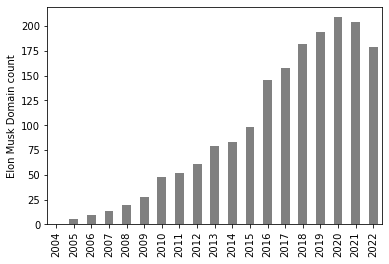

In [22]:
# Count the number of unique domains per year
page1_annual_domain_counts = {year:len(domain_counts) for year,domain_counts in page1_annual_domains.items()}

# Convert to a Series and plot
ax = pd.Series(page1_annual_domain_counts).plot(kind='bar',color='grey')
ax.set_ylabel('Elon Musk Domain count')

In [12]:
page1_annual_domains_df = pd.DataFrame.from_dict(page1_annual_domains)
page1_annual_domains_df.fillna(0,inplace=True)

# Reindex so the DataFrame is sorted by the number of appearances
_ix = page1_annual_domains_df.sum(1).sort_values(ascending=False).index
page1_annual_domains_df = page1_annual_domains_df.loc[_ix]

# Inspect
page1_annual_domains_df.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
https://web.archive.org/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,27.0,29.0,39.0,334.0,284.0
https://www.theguardian.com/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,14.0,17.0,20.0,16.0
http://www.spacex.com/,0.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,3.0,7.0,8.0,8.0,8.0,8.0,9.0,8.0,8.0,4.0,0.0
https://www.forbes.com/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,13.0,17.0,17.0,16.0
https://twitter.com/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.0,19.0,23.0,16.0,5.0


<AxesSubplot:>

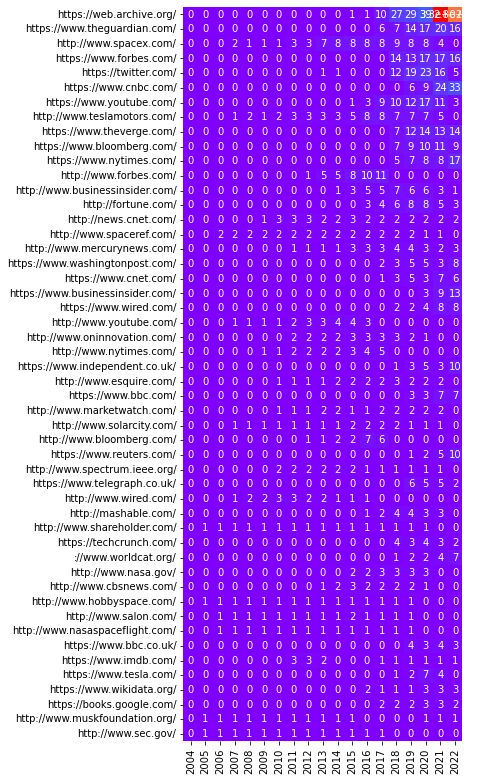

In [13]:
f,ax = plt.subplots(1,1,figsize=(5,20))

sb.heatmap(page1_annual_domains_df[:50],ax=ax,cbar=False,square=True,cmap='rainbow',annot=True)

In [15]:
page2_en_rev_df = wf.get_all_page_revisions(page2_title,endpoint='en.wikipedia.org/w/api.php')

In [16]:
# Compute the year for each revision
page2_en_rev_df['year'] = page2_en_rev_df['date'].apply(lambda x:x.year)

# Get the first new revision of every year
page2_annual_revs = page2_en_rev_df.groupby('year')['revid'].min()

# Create a container to store the wiki-links for different years
page2_annual_wikilinks = {}

# Loop through each of these revisions and get the wikilinks on the page that year
for year,revid in page1_annual_revs.to_dict().items():
    page2_annual_wikilinks[year] = wf.get_revision_outlinks(revid, endpoint='en.wikipedia.org/w/api.php')

In [17]:
# Create a container to store the external links for different years
page2_annual_externallinks = {}

# Loop through each of these revisions and get the external links on the page that year
for year,revid in page1_annual_revs.to_dict().items():
    page2_annual_externallinks[year] = wf.get_revision_externallinks(revid, endpoint='en.wikipedia.org/w/api.php')

In [19]:
# For counting the number of values in a list
from collections import Counter

# Create a container to store the domains for each external link
page2_annual_domains = {}

for year, linklist in page2_annual_externallinks.items():
    # Create a container to store the domains for each year
    domain_list = []
    for link in linklist:
        parsed_uri = urlparse(link)
        domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)
        domain_list.append(domain)
        
    page2_annual_domains[year] = Counter(domain_list)
    
# Inspect 2006
page2_annual_domains[2006]

Counter({'http://h18020.www1.hp.com/': 1,
         'http://www.shareholder.com/': 1,
         'http://www.sec.gov/': 1,
         'http://www.fastcompany.com/': 1,
         'http://www.spaceref.com/': 2,
         'http://www.hobbyspace.com/': 1,
         'http://www.muskfoundation.org/': 1,
         'http://www.salon.com/': 1,
         'http://www.nasaspaceflight.com/': 1})

Text(0, 0.5, 'Tesla Domain count')

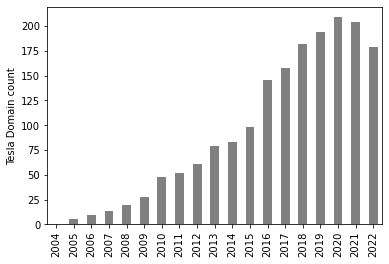

In [21]:
# Count the number of unique domains per year
page2_annual_domain_counts = {year:len(domain_counts) for year,domain_counts in page1_annual_domains.items()}

# Convert to a Series and plot
ax = pd.Series(page2_annual_domain_counts).plot(kind='bar',color='grey')
ax.set_ylabel('Tesla Domain count')